In this notebook I am going to use machine learning algorithm for model creation.<br>
I am going to use two machine learning algorithms:
1. Random Forest Classifier
2. Gradient Boosting Classifier

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Feature selection using Random Forest and Gradient Boosting
Here I am going to select important features from the dataset for classification with the help of Random Forest and Gradient Boosting classification algorithms. I wll train a model using these algorithms and get feature importance score for each features and according to feature importance score I will select features

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Applied_ai/df_clean.csv")

In [7]:
'''
during object detection in image I have exteacted 3 objects with their respective probabilities. The probability values
are stored in a list and list is in the form of string. SO I am going to convert them back to list and will make three
different features for these probabilities.
'''

#converting lists of string type to list
from ast import literal_eval
df['img_feature_pred'] = df['img_feature_pred'].apply(literal_eval)

In [8]:
#getting probabitity values in three different lists to make them as seperate features
img_feature_pred_1 = []
img_feature_pred_2 = []
img_feature_pred_3 = []
for i in df['img_feature_pred']:
  img_feature_pred_1.append(i[0])
  img_feature_pred_2.append(i[1])
  img_feature_pred_3.append(i[2])

In [9]:
#creating features for probability values
df['img_feature_pred_1'] = img_feature_pred_1
df['img_feature_pred_2'] = img_feature_pred_2
df['img_feature_pred_3'] = img_feature_pred_3

Since our project is to predict the dankness of the meme and it will be done before posting the meme on social networking sites. So, before posting data such as num_comments, upvote_ratio, score etc will not be available for the post and also it will be good if we predict the dankness of memes irrespective of subscribers count on the page. So, I am going to drop those features.

In [10]:
#dropping features as discussed above
df.drop(['img_feature_pred','text','is_original_content','num_comments','upvote_ratio','score','subreddit_subscribers'], axis=1, inplace=True)

In [11]:
#seperating dependent and independent features
y = df['dank_or_not']
X = df.drop(['dank_or_not'], axis=1)

In [12]:
#splitting the dataset in train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

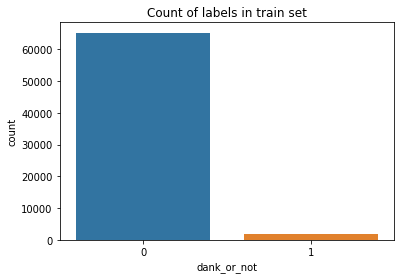

In [18]:
#checking for ratio of labels in train dataset
sns.countplot(y_train)
plt.title('Count of labels in train set')
plt.show()

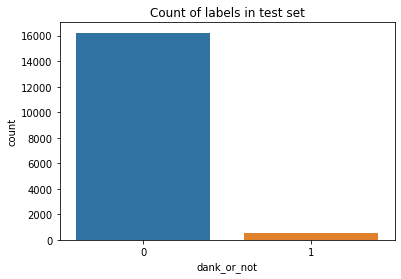

In [19]:
#checking for ratio of labels in test dataset
sns.countplot(y_test)
plt.title('Count of labels in test set')
plt.show()

Ratio of labels in both train and test set is same and imbalanced.

In [78]:
#importing libraries to train models and get metrics values
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, make_scorer
from sklearn.metrics import roc_auc_score, confusion_matrix

In [21]:
#parameter value to perform gridsearch cv
params = {'n_estimators' : [50, 100, 500]}

In [22]:
#using random forest classifier to get feature importance
rf = RandomForestClassifier()
clf_rf = GridSearchCV(rf, params , cv=3, scoring='roc_auc') 

In [23]:
clf_rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [24]:
clf_rf.best_params_

{'n_estimators': 500}

In [25]:
rf = RandomForestClassifier(n_estimators=clf_rf.best_params_['n_estimators'])
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
#saving feature name and their corresponding importance of random forest in a dictionary
rf_features = {}
for feature, importance in zip(X_train.columns, rf.feature_importances_):
	rf_features[feature] = importance

#sorting the dictionary
rf_features = dict(sorted(rf_features.items(), key=lambda item: item[1]))

In [27]:
#using gradient boosting classifier to get feature importance
gb = GradientBoostingClassifier()
clf_gb = GridSearchCV(gb, params , cv=3, scoring='roc_auc') 

In [28]:
clf_gb.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [29]:
clf_gb.best_params_

{'n_estimators': 50}

In [30]:
gb = GradientBoostingClassifier(n_estimators=clf_gb.best_params_['n_estimators'])
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [31]:
#saving feature name and their corresponding importance of gradient boosting in a dictionary
gb_features = {}
for feature, importance in zip(X_train.columns, gb.feature_importances_):
	gb_features[feature] = importance

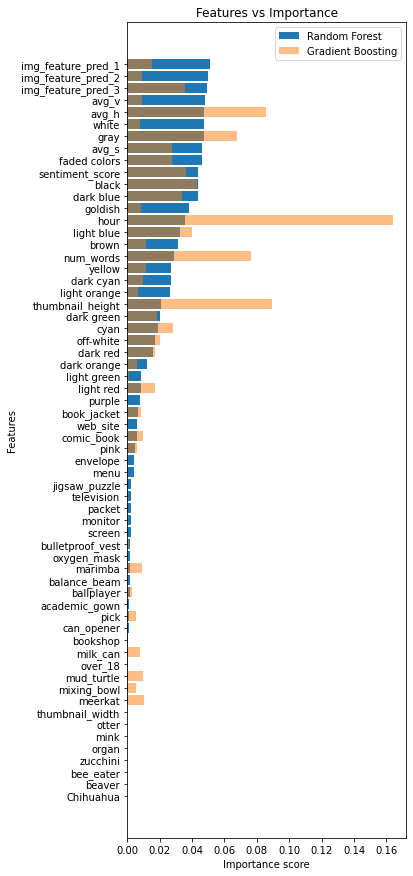

In [55]:
# plot feature importance
plt.figure(figsize=(5,15))
pyplot.barh(list(rf_features.keys()), rf_features.values())
pyplot.barh(list(gb_features.keys()), gb_features.values(),alpha=0.5)
plt.title('Features vs Importance')
plt.xlabel('Importance score')
plt.ylabel('Features')
plt.legend(['Random Forest', 'Gradient Boosting'])
pyplot.show()

Here we can see that both the models have shown almost same feature importance with some variability. 
* Some of the features like thumbnail height, number of words, hour of posting the meme and sentiment score are playing major role in classifying memes.
* Hue, saturation and value of the images are playing important role.
* Colors which are extracted from the meme images such as gray, white, faded colors, black, dark blue, goldish, light blue, brown, yellow, dark cyan, light orange, dark green, cyan, off-white, dark red, dark orange and light red are important.
* Very few objects which were extracted from images such as website, book jacket, packet and mud turtle are important but their probabilities (three objects of an image) are very important.

<br>
Now, extracting important fatures from the dataset to train the model


In [33]:
df_imp_feature = df[['img_feature_pred_1','img_feature_pred_2','img_feature_pred_3','avg_h','avg_s','avg_v','sentiment_score','hour',
    'num_words','thumbnail_height','thumbnail_width','gray', 'white', 'faded colors', 'black', 'dark blue', 'goldish',
    'light blue', 'brown', 'yellow', 'dark cyan', 'light orange', 'dark green', 'cyan', 'off-white', 'dark red', 
    'dark orange', 'light red','web_site','book_jacket','packet','mud_turtle','dank_or_not']]

In [34]:
#saving dataset containing important features
df_imp_feature.to_csv('df_imp_feature.csv', index=False)

# **Model creation**

In [35]:
df = pd.read_csv("/content/drive/MyDrive/Applied_ai/df_imp_feature.csv")

In [36]:
y = df['dank_or_not']
X = df.drop(['dank_or_not'], axis=1)

In [37]:
#splitting the dataset in train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [38]:
#parameter value to perform gridsearch cv
params = {'n_estimators' : [50, 100, 500]}

### Random Froest without sampling

In [39]:
#using random forest classifier to get feature importance
rf = RandomForestClassifier()
clf_rf = GridSearchCV(rf, params , cv=3, scoring='roc_auc') 

In [40]:
#training the model
clf_rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [41]:
#predicting values and probabilities
y_pred_rf = clf_rf.predict(X_test)
y_prob_rf = clf_rf.predict_proba(X_test)
y_prob_rf = y_prob_rf[:,1]    #getting probability for only '1' value

In [42]:
#getting true negative, false positive, false negative and true positive values from confusion matrix
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test, y_pred_rf).ravel()

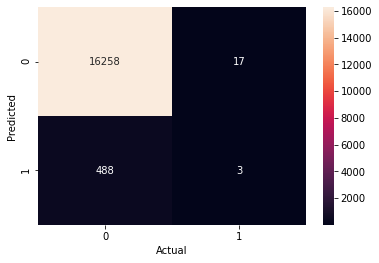

In [43]:
#plotting confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [44]:
#various metrics values of the model
ac_rf = accuracy_score(y_test, y_pred_rf).round(4)
pr_rf = precision_score(y_test, y_pred_rf).round(4)
re_rf = recall_score(y_test, y_pred_rf).round(4)
f1_rf = f1_score(y_test, y_pred_rf).round(4)
sensitivity_rf = (tp_rf/(tp_rf+fn_rf)).round(4)
specificity_rf = (tn_rf/(tn_rf+fp_rf)).round(4)
auc_rf = roc_auc_score(y_test, y_prob_rf).round(4)

In [45]:
print('accuracy score : ',ac_rf)
print('precision      : ',pr_rf)
print('recall         : ',re_rf)
print('F1 score       : ',f1_rf)
print('sensitivity    : ',sensitivity_rf)
print('specificity    : ',specificity_rf)
print('AUC            : ',auc_rf)

accuracy score :  0.9699
precision      :  0.15
recall         :  0.0061
F1 score       :  0.0117
sensitivity    :  0.0061
specificity    :  0.999
AUC            :  0.6163


### Gradient Boost without sampling

In [46]:
#using gradient boosting classifier to get feature importance
gb = GradientBoostingClassifier()
clf_gb = GridSearchCV(gb, params , cv=3, scoring='roc_auc') 

In [47]:
#training the model
clf_gb.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [48]:
#predicting values and probabilities
y_pred_gb = clf_gb.predict(X_test)
y_prob_gb = clf_gb.predict_proba(X_test)
y_prob_gb = y_prob_gb[:,1]    #getting probability for only '1' value

In [49]:
#getting true negative, false positive, false negative and true positive values from confusion matrix
tn_gb, fp_gb, fn_gb, tp_gb = confusion_matrix(y_test, y_pred_gb).ravel()

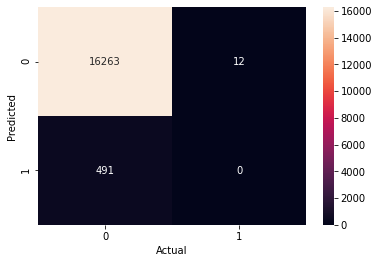

In [50]:
#plotting confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [51]:
#various metrics values of the model
ac_gb = accuracy_score(y_test, y_pred_gb).round(4)
pr_gb = precision_score(y_test, y_pred_gb).round(4)
re_gb = recall_score(y_test, y_pred_gb).round(4)
f1_gb = f1_score(y_test, y_pred_gb).round(4)
sensitivity_gb = (tp_rf/(tp_rf+fn_gb)).round(4)
specificity_gb = (tn_rf/(tn_rf+fp_gb)).round(4)
auc_gb = roc_auc_score(y_test, y_prob_gb).round(4)

In [52]:
print('accuracy score : ',ac_gb)
print('precision      : ',pr_gb)
print('recall         : ',re_gb)
print('F1 score       : ',f1_gb)
print('sensitivity    : ',sensitivity_gb)
print('specificity    : ',specificity_gb)
print('AUC            : ',auc_gb)

accuracy score :  0.97
precision      :  0.0
recall         :  0.0
F1 score       :  0.0
sensitivity    :  0.0061
specificity    :  0.9993
AUC            :  0.6205


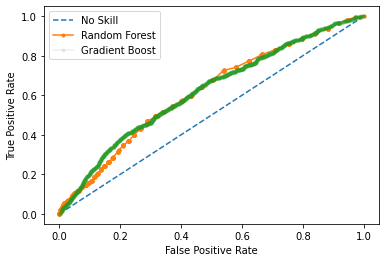

In [56]:
'''Plotting ROC curve for both Random Forest and Gradient Boosting Classifiers trained on unsampled data'''

#no-skill values
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr_rf, tpr_rf, marker='.', label='Random Forest')
pyplot.plot(fpr_gb, tpr_gb, marker='.', label='Gradient Boost', alpha=0.1)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Up-sampling the train data

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
# transform the dataset
oversample = SMOTE()
X_train_u, y_train_u = oversample.fit_resample(X_train, y_train)

### Training Random Forest with upsampled data

In [61]:
#using random forest classifier to get feature importance
rf_us = RandomForestClassifier()
clf_rf_us = GridSearchCV(rf_us, params , cv=3, scoring='roc_auc') 

In [62]:
#training the model
clf_rf_us.fit(X_train_u, y_train_u)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [63]:
#predicting values and probabilities
y_pred_rf_us = clf_rf_us.predict(X_test)
y_prob_rf_us = clf_rf_us.predict_proba(X_test)
y_prob_rf_us = y_prob_rf_us[:,1]    #getting probability for only '1' value

In [64]:
#getting true negative, false positive, false negative and true positive values from confusion matrix
tn_rf_us, fp_rf_us, fn_rf_us, tp_rf_us = confusion_matrix(y_test, y_pred_rf_us).ravel()

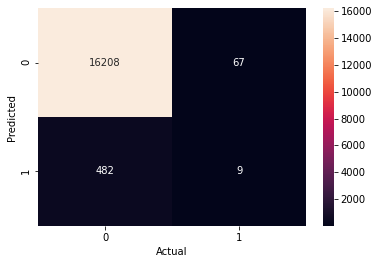

In [65]:
#plotting confusion matrix
cm_rf_us = confusion_matrix(y_test, y_pred_rf_us)
sns.heatmap(cm_rf_us, annot=True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [66]:
#various metrics values of the model
ac_rf_us = accuracy_score(y_test, y_pred_rf_us).round(4)
pr_rf_us = precision_score(y_test, y_pred_rf_us).round(4)
re_rf_us = recall_score(y_test, y_pred_rf_us).round(4)
f1_rf_us = f1_score(y_test, y_pred_rf_us).round(4)
sensitivity_rf_us = (tp_rf_us/(tp_rf_us + fn_rf_us)).round(4)
specificity_rf_us = (tn_rf_us/(tn_rf_us + fp_rf_us)).round(4)
auc_rf_us = roc_auc_score(y_test, y_prob_rf_us).round(4)

In [67]:
print('accuracy score : ',ac_rf_us)
print('precision      : ',pr_rf_us)
print('recall         : ',re_rf_us)
print('F1 score       : ',f1_rf_us)
print('sensitivity    : ',sensitivity_rf_us)
print('specificity    : ',specificity_rf_us)
print('AUC            : ',auc_rf_us)

accuracy score :  0.9673
precision      :  0.1184
recall         :  0.0183
F1 score       :  0.0317
sensitivity    :  0.0183
specificity    :  0.9959
AUC            :  0.6074


### Training Random Forest with upsampled data

In [68]:
#using gradient boosting classifier to get feature importance
gb_us = GradientBoostingClassifier()
clf_gb_us = GridSearchCV(gb_us, params , cv=3, scoring='roc_auc') 

In [69]:
#training the model
clf_gb_us.fit(X_train_u,y_train_u)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [70]:
#predicting values and probabilities
y_pred_gb_us = clf_gb_us.predict(X_test)
y_prob_gb_us = clf_gb_us.predict_proba(X_test)
y_prob_gb_us = y_prob_gb_us[:,1]    #getting probability for only '1' value

In [71]:
#getting true negative, false positive, false negative and true positive values from confusion matrix
tn_gb_us, fp_gb_us, fn_gb_us, tp_gb_us = confusion_matrix(y_test, y_pred_gb_us).ravel()

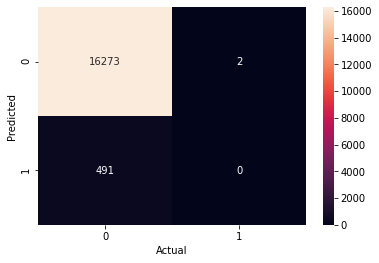

In [72]:
#plotting confusion matrix
cm_gb_us = confusion_matrix(y_test, y_pred_gb_us)
sns.heatmap(cm_gb_us, annot=True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [73]:
#various metrics values of the model
ac_gb_us = accuracy_score(y_test, y_pred_gb_us).round(4)
pr_gb_us = precision_score(y_test, y_pred_gb_us).round(4)
re_gb_us = recall_score(y_test, y_pred_gb_us).round(4)
f1_gb_us = f1_score(y_test, y_pred_gb_us).round(4)
sensitivity_gb_us = (tp_rf_us/(tp_rf_us + fn_gb_us)).round(4)
specificity_gb_us = (tn_rf_us/(tn_rf_us + fp_gb_us)).round(4)
auc_gb_us = roc_auc_score(y_test, y_prob_gb_us).round(4)

In [74]:
print('accuracy score : ',ac_gb_us)
print('precision      : ',pr_gb_us)
print('recall         : ',re_gb_us)
print('F1 score       : ',f1_gb_us)
print('sensitivity    : ',sensitivity_gb_us)
print('specificity    : ',specificity_gb_us)
print('AUC            : ',auc_gb_us)

accuracy score :  0.9706
precision      :  0.0
recall         :  0.0
F1 score       :  0.0
sensitivity    :  0.018
specificity    :  0.9999
AUC            :  0.5917


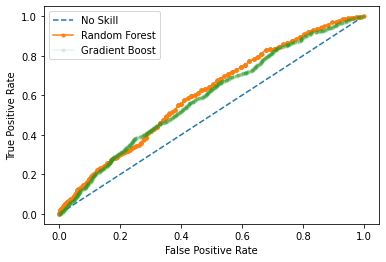

In [75]:
'''Plotting ROC curve for both Random Forest and Gradient Boosting Classifiers trained on unsampled data'''

#no-skill values
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
fpr_rf_us, tpr_rf_us, _ = roc_curve(y_test, y_prob_rf_us)
fpr_gb_us, tpr_gb_us, _ = roc_curve(y_test, y_prob_gb_us)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr_rf_us, tpr_rf_us, marker='.', label='Random Forest')
pyplot.plot(fpr_gb_us, tpr_gb_us, marker='.', label='Gradient Boost', alpha=0.1)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Training Balanced Bagging Classifier
This is modified version of the bagged decision tree ensemble that performs random undersampling of the majority class prior to fitting each decision tree.

In [79]:
#using Balanced Boosting classifier
bbc = BalancedBaggingClassifier()
clf_bbc = GridSearchCV(bbc, params , cv=3, scoring='roc_auc') 

In [80]:
#training the model
clf_bbc.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=BalancedBaggingClassifier(base_estimator=None,
                                                 bootstrap=True,
                                                 bootstrap_features=False,
                                                 max_features=1.0,
                                                 max_samples=1.0,
                                                 n_estimators=10, n_jobs=1,
                                                 oob_score=False,
                                                 random_state=None, ratio=None,
                                                 replacement=False,
                                                 sampling_strategy='auto',
                                                 verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [50, 100, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,

In [81]:
#predicting values and probabilities
y_pred_bbc = clf_bbc.predict(X_test)
y_prob_bbc = clf_bbc.predict_proba(X_test)
y_prob_bbc = y_prob_bbc[:,1]    #getting probability for only '1' value

In [82]:
#getting true negative, false positive, false negative and true positive values from confusion matrix
tn_bbc, fp_bbc, fn_bbc, tp_bbc = confusion_matrix(y_test, y_pred_bbc).ravel()

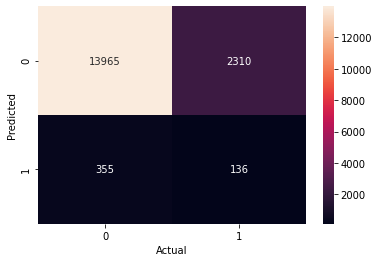

In [83]:
#plotting confusion matrix
cm_bbc = confusion_matrix(y_test, y_pred_bbc)
sns.heatmap(cm_bbc, annot=True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [84]:
#various metrics values of the model
ac_bbc = accuracy_score(y_test, y_pred_bbc).round(4)
pr_bbc = precision_score(y_test, y_pred_bbc).round(4)
re_bbc = recall_score(y_test, y_pred_bbc).round(4)
f1_bbc = f1_score(y_test, y_pred_bbc).round(4)
sensitivity_bbc = (tp_bbc/(tp_bbc + fn_bbc)).round(4)
specificity_bbc = (tn_bbc/(tn_bbc + fp_bbc)).round(4)
auc_bbc = roc_auc_score(y_test, y_prob_bbc).round(4)

In [85]:
print('accuracy score : ',ac_bbc)
print('precision      : ',pr_bbc)
print('recall         : ',re_bbc)
print('F1 score       : ',f1_bbc)
print('sensitivity    : ',sensitivity_bbc)
print('specificity    : ',specificity_bbc)
print('AUC            : ',auc_bbc)

accuracy score :  0.841
precision      :  0.0556
recall         :  0.277
F1 score       :  0.0926
sensitivity    :  0.277
specificity    :  0.8581
AUC            :  0.6432


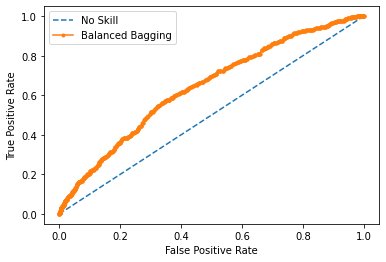

In [86]:
'''Plotting ROC curve for Balanced Bagging Classifier'''

#no-skill values
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
fpr_bbc, tpr_bbc, _ = roc_curve(y_test, y_prob_bbc)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr_bbc, tpr_bbc, marker='.', label='Balanced Bagging')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [87]:
from prettytable import PrettyTable
x = PrettyTable()

In [88]:
x.field_names = ["Algorithm", "Accuracy", "Precision", "Recall", "F1 score", "AUC", "Sensitivity", "Specificity", "Sampled"]
x.add_row(["Random Forest Classifier", ac_rf, pr_rf,re_rf,f1_rf,auc_rf,sensitivity_rf,specificity_rf,'No'])
x.add_row(["Gradient Boosting Classifier", ac_gb, pr_gb,re_gb,f1_gb,auc_gb,sensitivity_gb,specificity_gb,'No'])
x.add_row(["Random Forest Classifier", ac_rf_us, pr_rf_us,re_rf_us,f1_rf_us,auc_rf_us,sensitivity_rf_us,specificity_rf_us,'Up-sampled'])
x.add_row(["Gradient Boosting Classifier", ac_gb_us, pr_gb_us,re_gb_us,f1_gb_us,auc_gb_us,sensitivity_gb_us,specificity_gb_us,'Up-sampled'])
x.add_row(["Balanced Bagging Classifier", ac_bbc, pr_bbc,re_bbc,f1_bbc,auc_bbc,sensitivity_bbc,specificity_bbc,'Down-sampled'])
print(x)

+------------------------------+----------+-----------+--------+----------+--------+-------------+-------------+--------------+
|          Algorithm           | Accuracy | Precision | Recall | F1 score |  AUC   | Sensitivity | Specificity |   Sampled    |
+------------------------------+----------+-----------+--------+----------+--------+-------------+-------------+--------------+
|   Random Forest Classifier   |  0.9699  |    0.15   | 0.0061 |  0.0117  | 0.6163 |    0.0061   |    0.999    |      No      |
| Gradient Boosting Classifier |   0.97   |    0.0    |  0.0   |   0.0    | 0.6205 |    0.0061   |    0.9993   |      No      |
|   Random Forest Classifier   |  0.9673  |   0.1184  | 0.0183 |  0.0317  | 0.6074 |    0.0183   |    0.9959   |  Up-sampled  |
| Gradient Boosting Classifier |  0.9706  |    0.0    |  0.0   |   0.0    | 0.5917 |    0.018    |    0.9999   |  Up-sampled  |
| Balanced Bagging Classifier  |  0.841   |   0.0556  | 0.277  |  0.0926  | 0.6432 |    0.277    |    0.

From the table we can see that Random Forest is performing better than Gradient Boosting Classifier. The best performing algorithm is Balanced Bagging Classifier which is modified version of the bagged decision tree ensemble that performs random undersampling of the majority class prior to fitting each decision tree.<br><br>
So I am going to save this model in pickle form

In [89]:
import pickle

In [90]:
pickle.dump(clf_bbc, open('dankornot_ml.pkl', 'wb'))